# Multiple Linear Regression

### Regression Model on an existing dataset

In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [2]:
# Loading the dataset - Boston
boston = load_boston()

In [3]:
# Displaying the structure of dataset
print("Keys of boston dataset:{}".format(boston.keys()))
print("Description of boston dataset:{}".format(boston["DESCR"]))
print("Feature Names:{}".format(boston["feature_names"]))
print("Dimensions of data variables:{}".format(boston["data"].shape))
print("Dimensions of target variable:{}".format(boston["target"].shape))

Keys of boston dataset:dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
Description of boston dataset:.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      in

In [4]:
# Creating a dataframe of Boston dataset
bostondf = pd.DataFrame(boston.data, columns = boston.feature_names)
bostondf["MEDV"] = boston.target

In [5]:
bostondf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
# Generating the same dataset using the seed() function
np.random.seed(2000)

In [7]:
# Creating the training and test dataset
training, test = train_test_split(bostondf, test_size = 0.30)
x_trg = training.drop("MEDV", axis = 1)
y_trg = training["MEDV"]

x_test = test.drop("MEDV", axis = 1)
y_test = test["MEDV"]

In [8]:
# Creating a linear regression model
model1 = linear_model.LinearRegression()

In [9]:
# Train the model using training sets
model1.fit(x_trg, y_trg)

LinearRegression()

In [10]:
# Determining accuracy of the training set
print("Accuracy of training dataset is: ", model1.score(x_trg, y_trg))

Accuracy of training dataset is:  0.7497329669344379


In [11]:
# Displaying the equation coefficient and intercept
print("Value of Coefficient is: \n", model1.coef_)
print("Value of Intercept is: \n", model1.intercept_)

Value of Coefficient is: 
 [-1.03910566e-01  3.03790199e-02 -6.07304248e-02  1.22375885e+00
 -1.56868905e+01  3.82289411e+00 -3.70049661e-03 -1.35985060e+00
  2.70620421e-01 -1.04886675e-02 -1.04492769e+00  9.54682149e-03
 -4.70256905e-01]
Value of Intercept is: 
 36.67861963321748


In [12]:
# Predict the output from test set
predicted = model1.predict(x_test)

In [13]:
predicted

array([41.40978416, 12.78329777, 23.57940294, 24.93030624, 30.88892787,
       15.23224587, 29.02584785, 17.43636134,  3.75273323, 21.86590307,
       25.01463899, 21.00424075, 18.76348665, 16.67527185, 21.15837671,
       21.94537235, 14.26246705, 21.18339072,  7.70720208, 26.15226557,
       18.33533085, 31.19675385, 14.1219609 , 17.59432573, 22.30293962,
       16.29026701, 31.80359496, 14.27746051,  6.10094017, 21.18836621,
       16.85798361, 33.88756076, 27.06709072, 23.29272898, 13.14484941,
       19.1565005 , 23.9408148 , 21.51146503, 16.13450045, 20.82420206,
       20.74886367, 20.87536564, 13.04897197, 14.28005529, 33.73146177,
       28.52445727, 22.7359519 , 20.14791781, 20.83290999, 29.23645842,
       36.62000174, 27.58812053, 21.90624589, 17.86456639, 23.37014878,
       22.44688325, 33.29111647, 16.19857411,  1.41671058, 20.49938212,
       25.7346174 , 19.66893575, 15.0193747 , 22.84231963, 21.3195971 ,
       23.05664342, 36.51511308, 37.13870242, 15.90828334, 32.78

In [14]:
# Determine the root mean squared error (RMSE)
rmse_model1 = sqrt(mean_squared_error(y_test, predicted))
print("The value of RMSE is: ", rmse_model1)

The value of RMSE is:  5.240437660983577


Here, we can see that RMSE is 4.037 which shows that it is not a good prediction and hence steps should be taken for improving the accuracy of the model. We should take steps to lower the RMSE by decreasing number of variables and checking the whether the RMSE value after each change of the model and then finally determining the best model.

Steps that can be taken here:
- Increasing the sample size
- Assuming fulfillment for reducing the number of independent variables
- Chaning the model
- Data Exploration and Processing etc.

In [15]:
# Importing the necessary packages
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

#### Step 1 - A: Understanding the dataset

In [16]:
# Develop a model after data exploration and processing
boston = load_boston()
print("Dimension of Boston dataset: ", boston.data.shape)
print("Dimension of Target dataset: ", boston.target.shape)

Dimension of Boston dataset:  (506, 13)
Dimension of Target dataset:  (506,)


In [17]:
# Determining the name of the columns
columns = boston.feature_names
print("The name of the columns are: \n", columns)

The name of the columns are: 
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [18]:
# Create the dataframe from available data
boston_datadf = pd.DataFrame(boston.data)
boston_datadf.columns = columns
boston_targetdf = pd.DataFrame(boston.target)

In [19]:
# Determine the nature of variables
print("Details of variables in the dataset: \n", boston_datadf.describe())

Details of variables in the dataset: 
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  35

In [20]:
# Determine nature of single variable
print("The details of CRIM are: \n", boston_datadf["CRIM"].describe())

The details of CRIM are: 
 count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64


In [21]:
# Determine the number of observations for each value of CHAS
print("The details of CHAS is: \n", boston_datadf["CHAS"].value_counts())

The details of CHAS is: 
 0.0    471
1.0     35
Name: CHAS, dtype: int64


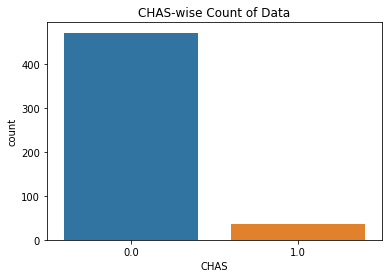

In [22]:
# Determine count in visual form using count plot
sns.countplot(x = "CHAS", data = boston_datadf).set_title("CHAS-wise Count of Data")
plt.show()

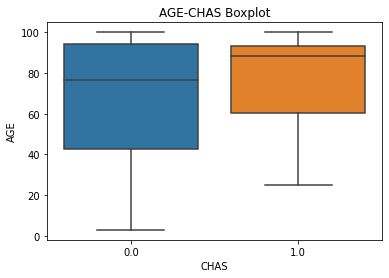

In [23]:
# Creating a Box-plot
sns.boxplot(x = "CHAS", y = "AGE", data = boston_datadf).set_title("AGE-CHAS Boxplot")
plt.show()

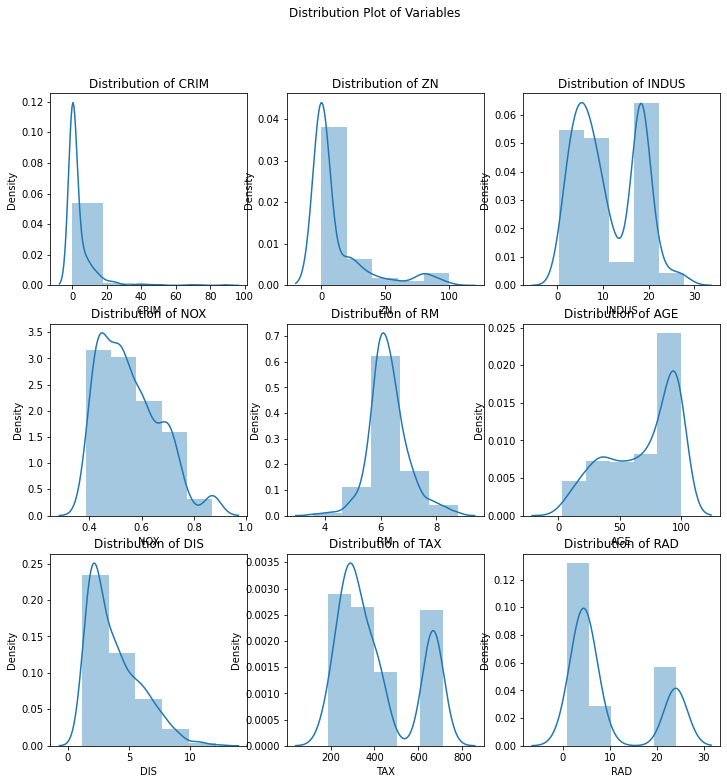

In [24]:
# Distribution plot of variables
plt.figure(1, figsize = (12, 12))
plt.subplot(331)
sns.distplot(boston_datadf["CRIM"], bins=5).set_title("Distribution of CRIM")
plt.subplot(332)
sns.distplot(boston_datadf["ZN"], bins=5).set_title("Distribution of ZN")
plt.subplot(333)
sns.distplot(boston_datadf["INDUS"], bins=5).set_title("Distribution of INDUS")
plt.subplot(334)
sns.distplot(boston_datadf["NOX"], bins=5).set_title("Distribution of NOX")
plt.subplot(335)
sns.distplot(boston_datadf["RM"], bins=5).set_title("Distribution of RM")
plt.subplot(336)
sns.distplot(boston_datadf["AGE"], bins=5).set_title("Distribution of AGE")
plt.subplot(337)
sns.distplot(boston_datadf["DIS"], bins=5).set_title("Distribution of DIS")
plt.subplot(338)
sns.distplot(boston_datadf["TAX"], bins=5).set_title("Distribution of TAX")
plt.subplot(339)
sns.distplot(boston_datadf["RAD"], bins=5).set_title("Distribution of RAD")
plt.suptitle("Distribution Plot of Variables")
plt.show()

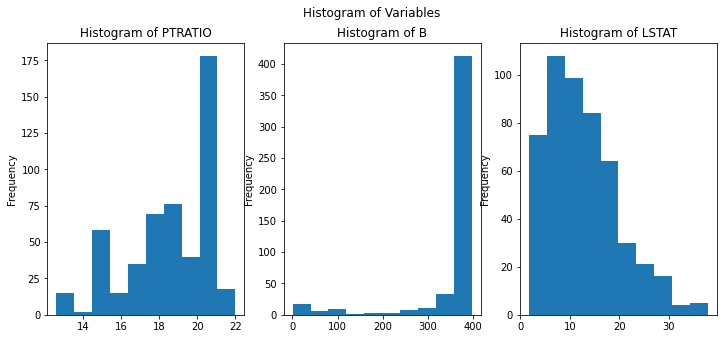

In [25]:
# Histogram plot of variables - PTRATIO, B and LSTAT
plt.figure(2, figsize = (12,5))
plt.subplot(131)
boston_datadf["PTRATIO"].plot.hist(bins = 10).set_title("Histogram of PTRATIO")
plt.subplot(132)
boston_datadf["B"].plot.hist(bins = 10).set_title("Histogram of B")
plt.subplot(133)
boston_datadf["LSTAT"].plot.hist(bins = 10).set_title("Histogram of LSTAT")
plt.suptitle("Histogram of Variables")
plt.show()

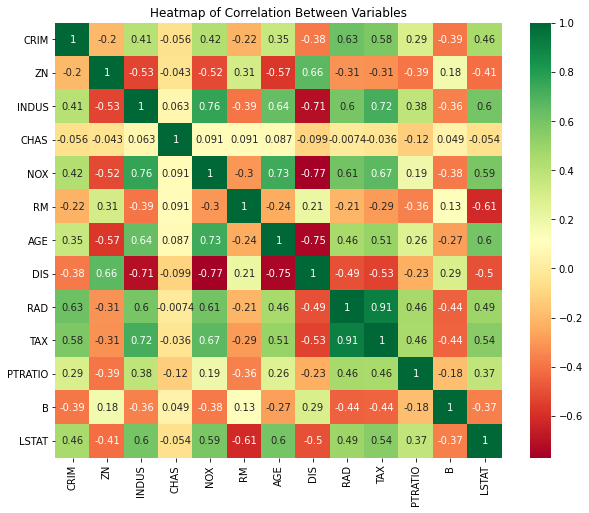

In [26]:
# Generate Heatmap to understand the correlation
sns.heatmap(boston_datadf.corr(), annot = True, cmap = "RdYlGn")
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.title("Heatmap of Correlation Between Variables", fontsize = 12)
plt.show()

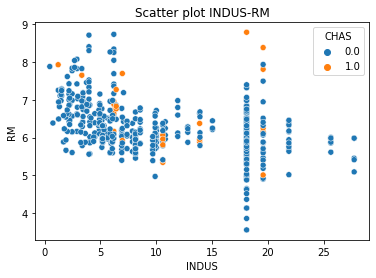

In [27]:
# Generating a scatter plot
sns.scatterplot(x = "INDUS", y = "RM", hue = "CHAS", data = boston_datadf).set_title("Scatter plot INDUS-RM")
plt.xlabel("INDUS")
plt.ylabel("RM")
plt.show()

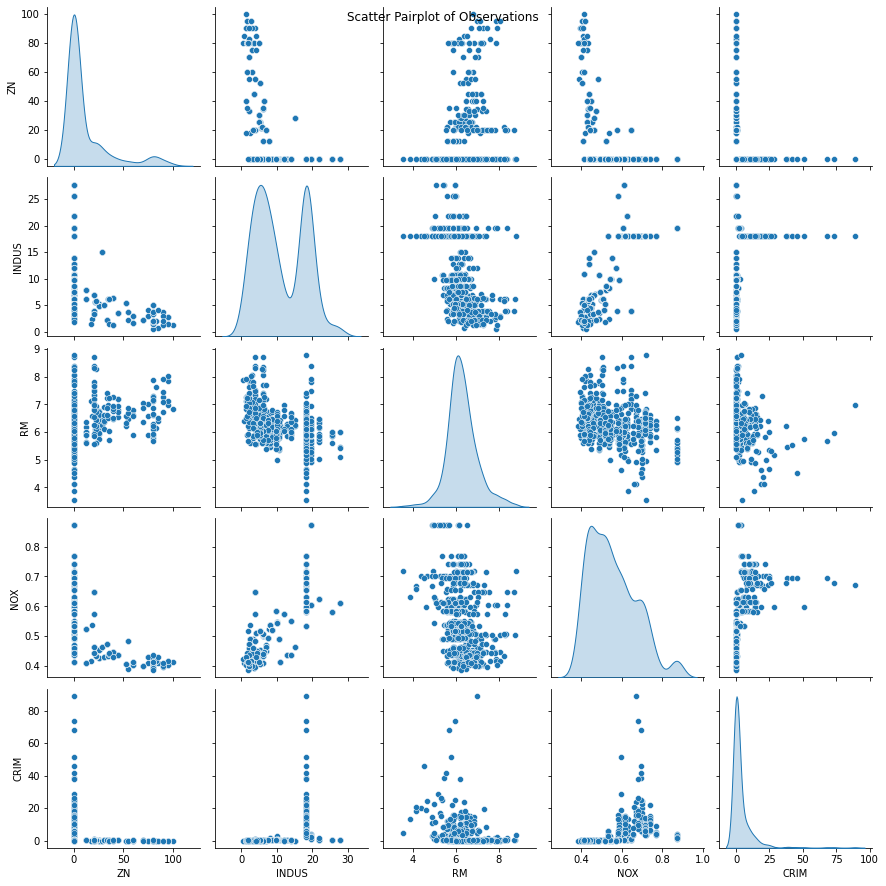

In [28]:
# Scatter pair plot considering kde as diagonal plot
sns.pairplot(boston_datadf[["ZN", "INDUS", "RM", "NOX", "CRIM"]], kind = "scatter", diag_kind = "kde")
plt.suptitle("Scatter Pairplot of Observations")
plt.show()

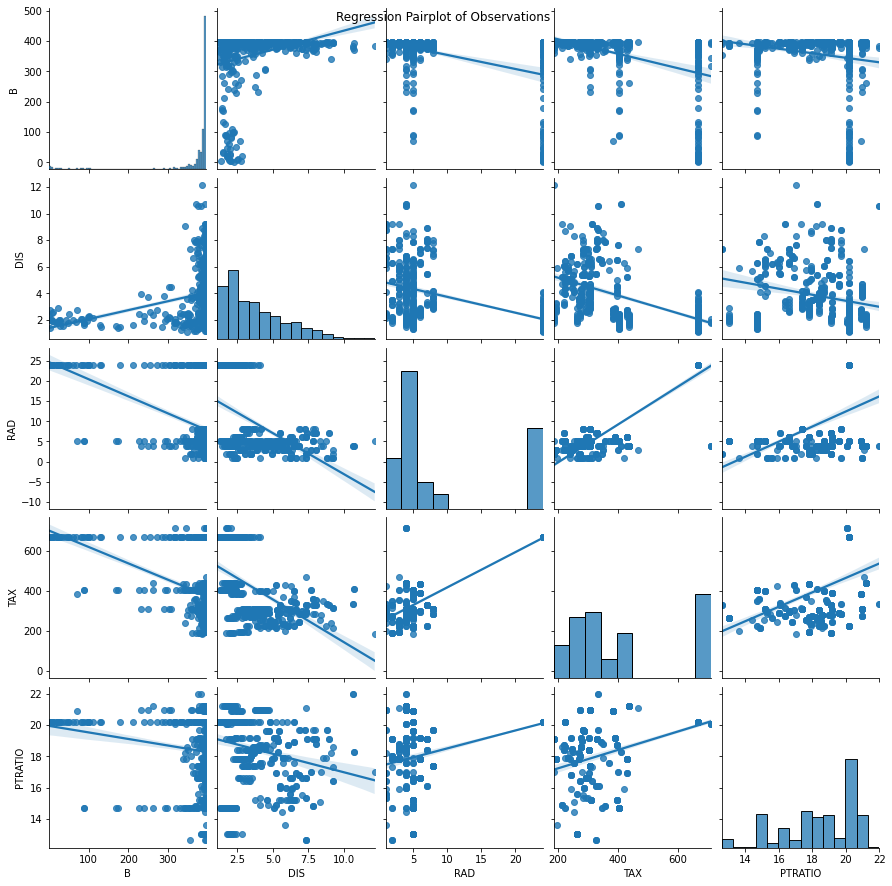

In [29]:
# Regression pair plot considering histogram as diagonal plot
sns.pairplot(boston_datadf[["B", "DIS", "RAD", "TAX", "PTRATIO"]], diag_kind = "hist", kind = "reg")
plt.suptitle("Regression Pairplot of Observations")
plt.show()

We can see that the details of dataframe shows all the variables are continuous in nature, except `CHAS`, it is described as `categorical` variable as because the variable has maximum value as 1 and minimum value as 0.

#### Step 1 - B: Determining the Missing Values

In [30]:
print("Missing values in the dataset is: \n", boston_datadf.isnull().sum())

Missing values in the dataset is: 
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


From above we can infer that the dataset doesn't contain any missing values.

#### Step 1 - C: Assumptions Check

In [31]:
# Import the necessary packages
from scipy import stats
import numpy as np

In [32]:
# Normality Assumption: Determining normality of data
print("Skewness of data: \n", stats.skew(boston.data))
print("Kurtosis of data: \n", stats.kurtosis(boston.data))

print("Applying normality test: \n", stats.mstats.normaltest(boston.data))
print("Applying shapiro test: \n", stats.shapiro(boston.data))

Skewness of data: 
 [ 5.20765239  2.21906306  0.29414628  3.39579929  0.72714416  0.40241467
 -0.59718559  1.00877876  1.00183349  0.66796827 -0.79994453 -2.88179835
  0.90377074]
Kurtosis of data: 
 [36.75278626  3.97994877 -1.23321847  9.53145284 -0.07586422  1.86102697
 -0.97001393  0.47129857 -0.8705205  -1.14298488 -0.29411638  7.14376929
  0.47654476]
Applying normality test: 
 NormaltestResult(statistic=masked_array(data=[562.7482944823796, 228.270250071875,
                   420.09570785887826, 367.22042943884287,
                   37.509688611576536, 37.89574305099164,
                   114.16541878648749, 66.94502432373685,
                   116.94443040972402, 253.2164876649177,
                   45.944962469041954, 312.2559637510436,
                   57.20741558175859],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False],
       fill_value=1e+20), pvalue=array([6.32063196e-123, 2.70237121e-0

In [33]:
# Determining outliers by calculating z-score
zscore = np.abs(stats.zscore(boston_datadf))
print("The z-score of data is: \n", zscore)

The z-score of data is: 
 [[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [34]:
# Determine indexes where z-score > 3
outlier_list = np.where(zscore > 3)
print("The indexes of outliers is: \n", outlier_list[0])
print("The number of outliers is: ", len(outlier_list[0]))

The indexes of outliers is: 
 [ 55  56  57 102 141 142 152 154 155 160 162 163 199 200 201 202 203 204
 208 209 210 211 212 216 218 219 220 221 222 225 234 236 256 257 262 269
 273 274 276 277 282 283 283 284 347 351 352 353 353 354 355 356 357 358
 363 364 364 365 367 369 370 372 373 374 374 380 398 404 405 406 410 410
 411 412 412 414 414 415 416 418 418 419 423 424 425 426 427 427 429 431
 436 437 438 445 450 454 455 456 457 466]
The number of outliers is:  100


In [35]:
# Removing the outliers from the dataset
boston_datadf_new = boston_datadf[(zscore < 3).all(axis = 1)]
print("Dimension after removing outliers: \n", boston_datadf_new.shape)

Dimension after removing outliers: 
 (415, 13)


In [36]:
# Removing corresponding rows from target dataset too
boston.target = boston_targetdf.drop(index = outlier_list[0])

As we know the normality of data can be determined by `skewness` and `kurtosis`. Hence, normaltest(0) and Shapiro test() was performed. We can also see that skewness and kurtosis of many variables is found to be not falling in the range of -1 and +1. Also, the normal test and Shapiro test showed the p-value is significant as it is less than 0.05. So we can infer that *data cannot be considered as normal data.*

As we know outliers has a great impact on normality of data. Hence, we tried to remove the outliers where zscore value is less than 3.

#### Step 1 - C: Multi Collinearity Assumption: Use of VIF

In [37]:
# Import the necessary package
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
# Creating a function to remove multicollinear features
def vif_result(data):
    threshold = 4.0
    variables = list(range(data.shape[1]))
    deleted = True
    while deleted:
        deleted = False
        vifvalue = [variance_inflation_factor(data.iloc[:, variables].values, ix)
        for ix in range(data.iloc[:, variables].shape[1])]
        maxvifloc = vifvalue.index(max(vifvalue))
        if max(vifvalue) > threshold:
            print("Deleting\" "+data.iloc[:, variables].columns[maxvifloc]+
                          "\" at index: " + str(maxvifloc))
            del variables[maxvifloc]
            deleted = True
        
    print("Important predictor variables are: ", data.columns[variables])
    return data.iloc[:, variables]

In [39]:
# Calling the function to determine the new dimension
boston.data = vif_result(boston_datadf_new)
print("Dimension after multi collinearity assumption: ", boston.data.shape)

Deleting" RM" at index: 5
Deleting" PTRATIO" at index: 9
Deleting" NOX" at index: 4
Deleting" TAX" at index: 7
Deleting" B" at index: 7
Deleting" LSTAT" at index: 7
Deleting" AGE" at index: 4
Deleting" RAD" at index: 5
Important predictor variables are:  Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'DIS'], dtype='object')
Dimension after multi collinearity assumption:  (415, 5)


Over here we can see that a new dataframe is created that contains the predictor variables. The new dimensions of new dataset is (415, 5) that means there are 5 independent variables and remaining 8 variables are deleted which doesn't fulfill this VIF assumption.

#### Step 1-C: Linearity Assumption: Use of Correlation Coefficient

In [40]:
print("Spearman correlation coefficient between CRIM and target: \n",
     stats.stats.spearmanr(boston.data.iloc[1:417,0], boston.target[1:417]))
print("Spearman correlation coefficient between ZN and target: \n",
     stats.stats.spearmanr(boston.data.iloc[1:417,1], boston.target[1:417]))
print("Spearman correlation coefficient between INDUS and target: \n",
     stats.stats.spearmanr(boston.data.iloc[1:417,2], boston.target[1:417]))
print("Spearman correlation coefficient between CHAS and target: \n",
     stats.stats.spearmanr(boston.data.iloc[1:417,3], boston.target[1:417]))
print("Spearman correlation coefficient between DIS and target: \n",
     stats.stats.spearmanr(boston.data.iloc[1:417,4], boston.target[1:417]))

Spearman correlation coefficient between CRIM and target: 
 SpearmanrResult(correlation=-0.506367218195438, pvalue=2.4085202386386153e-28)
Spearman correlation coefficient between ZN and target: 
 SpearmanrResult(correlation=0.39819103267735634, pvalue=3.498815145150149e-17)
Spearman correlation coefficient between INDUS and target: 
 SpearmanrResult(correlation=-0.5712671182851916, pvalue=3.113389231017991e-37)
Spearman correlation coefficient between CHAS and target: 
 SpearmanrResult(correlation=nan, pvalue=nan)
Spearman correlation coefficient between DIS and target: 
 SpearmanrResult(correlation=0.40361485503471, pvalue=1.1874918477191319e-17)


In order to determine the linearity between independent and dependent variables, the Spearman correlation coefficient is used and we can see that there is correlation between independent and dependent variable as the correlation coefficient is found to be significant for all these variables. For `CHAS` and `target` variable the Spearman coefficient is `NaN` as because it is categorical in nature (not continuous data type).

#### Step 1-D: Feature Scaling

In [41]:
# Import the necessary package
from sklearn.preprocessing import StandardScaler

In [42]:
# Scaling the dataframe
sc = StandardScaler()
boston.data = sc.fit_transform(boston.data)
print("Standard Scaling is done on the dataset")

Standard Scaling is done on the dataset


#### Step 2: Model Development

In [43]:
# Using the random seed function to generate the same dataset
np.random.seed(3000)

In [44]:
# Splitting the dataset to training and test dataset for independent and dependent variables
x_trg, x_test, y_trg, y_test = train_test_split(boston.data, boston.target, random_state = 0)
print("Dimension of training, test dataset: ", x_trg.shape, x_test.shape)

Dimension of training, test dataset:  (311, 5) (104, 5)


In [45]:
# Creating a linear regression model on training dataset
model_2 = linear_model.LinearRegression()

In [46]:
# Fitting the linear regression model using training dataset
model_2.fit(x_trg, y_trg)

LinearRegression()

In [47]:
# Determine the equation coefficient and intercept of the new model
print("Coefficient of independent variables: \n", model_2.coef_)
print("Intercept in the model: \n", model_2.intercept_)

Coefficient of independent variables: 
 [[-2.45037832  1.93801135 -3.91733035  0.         -3.18719494]]
Intercept in the model: 
 [22.36235046]


#### Step 3: Predicting the Model

In [48]:
# Make prediction on test dataset
pred = model_2.predict(x_test)

In [49]:
pred

array([[16.4816441 ],
       [29.2979313 ],
       [31.42124945],
       [15.11996396],
       [18.49722275],
       [24.06135429],
       [20.27135804],
       [21.42073014],
       [23.50957336],
       [30.58536765],
       [16.13361835],
       [22.86414169],
       [25.55049488],
       [25.94109971],
       [17.8727743 ],
       [20.39246532],
       [17.240741  ],
       [27.00360018],
       [22.94131251],
       [21.85153564],
       [15.09387698],
       [25.280734  ],
       [17.05136361],
       [28.34186567],
       [20.51872632],
       [12.18061581],
       [25.86916645],
       [16.78331414],
       [18.14184125],
       [18.34186792],
       [16.93219513],
       [28.43445433],
       [23.2650895 ],
       [22.83229728],
       [22.90336584],
       [17.30242353],
       [29.0691727 ],
       [20.2941734 ],
       [21.06016873],
       [31.85353463],
       [18.61239169],
       [26.01651404],
       [23.08142987],
       [17.38811175],
       [23.86769115],
       [18

In [50]:
# Import the necessary package
from statsmodels.stats.stattools import durbin_watson

In [51]:
# Independence of error assumption: Durbin-Watson Test
resid = y_test - pred
print("Durbin Watson Test: ", durbin_watson(resid))

Durbin Watson Test:  [1.93159208]


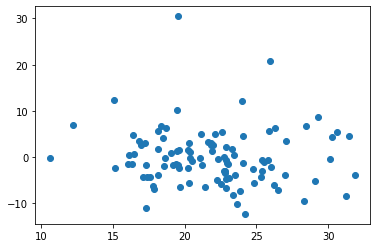

In [52]:
# Homoscedasticity assumption: Plot between residuals, predicted values
plt.scatter(pred, resid)
plt.show()

#### Step 4: Determine Accuracy of the model

In [53]:
# Calculate the RMSE for the new model
rmse = sqrt(mean_squared_error(y_test, pred))
print("RMSE value for new linear model is: ", rmse)

RMSE value for new linear model is:  6.0600777409330995


Over here we can see from above scatter plot between pred and resid shows that variance seems to be nearly same. Hence, homoscedasticity assumption is fulfilled. If there would have been another pattern then we are needed to transform the model to improve the accuracy.

The RMSE of the new model is 6.06 by considering only 5 variables indicates the better model as we tried to keep the accuracy same as previous model by considering very less number of independent variables.